In [25]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
with open(r"C:\Users\Nino\Desktop\events_England.json") as myfile :
    data = myfile.read()
events = pd.DataFrame(json.loads(data))
events.head(3)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609


Now I want to set different intervals like [0,9) , [9,18) ,... . First I filter the dataset based on the value of match period(1H , 2H) and then in each half of the match create 5 time slots. if the time of the an events is more than 45 minutes in first or second half of the game it should be in E1 or E2 time slot

In [6]:
first = events[events.matchPeriod == "1H"]
slot11 = first[first.eventSec/60 < 9]
s12 = first[first.eventSec/60 >= 9]
slot12 = s12[s12.eventSec/60 < 18]
s13 = first[first.eventSec/60 >= 18]
slot13 = s13[s13.eventSec/60 < 27]
s14 = first[first.eventSec/60 >= 27]
slot14 = s14[s14.eventSec/60 < 36]
s15 = first[first.eventSec/60 >= 36]
slot15 = s15[s15.eventSec/60 <= 45]



second = events[events.matchPeriod == "2H"]
slot21 = second[second.eventSec/60 < 9]
s22 = second[second.eventSec/60 >= 9]
slot22 = s22[s22.eventSec/60 < 18]
s23 = second[second.eventSec/60 >= 18]
slot23 = s23[s23.eventSec/60 < 27]
s24 = second[second.eventSec/60 >= 27]
slot24 = s24[s24.eventSec/60 < 36]
s25 = second[second.eventSec/60 >= 36]
slot25 = s25[s25.eventSec/60 <= 45]



E1 =first[first.eventSec/60 >45]
E2 = second[second.eventSec/60 >45]







In this step we restrict the rows of our datasets to the the ones that contain goal events (tag id = 101)


In [7]:
goal11 = slot11[slot11['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal12 = slot12[slot12['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal13 = slot13[slot13['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal14 = slot14[slot14['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal15 = slot15[slot15['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]


goal21 = slot21[slot21['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal22 = slot22[slot22['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal23 = slot23[slot23['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal24 = slot24[slot24['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal25 = slot25[slot25['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]




In [8]:
goalE1 = E1[E1['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goalE2 = E2[E2['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]

The number of goals in each time slot is equal to the number of rows of the dataframe which is related to that time slot. Then for making a bar plot we create a dataframe with indexes  equal to time slots and a column of number of goals

In [174]:
data = {"H1[0,9)" :len(goal11.index), "H1[9,18)": len(goal12.index),"H1[18,27)" : len(goal13.index), "H1[27,36)" :len(goal14.index), "H1[36,45]" : len(goal15.index),
              "H2[0,9)" : len(goal21.index),"H2[9,18)" : len(goal22.index), "H2[18,27)" : len(goal23.index), 
            "H2[27,36)" : len(goal24.index), "H2[36,45]" :len(goal25.index), "+45" : len(goalE1.index),"+90" : len(goalE2.index )}
goalTime= pd.DataFrame.from_dict(data, orient='index' , columns=["goals"])
goalTime


,goals
"H1[0,9)",140
"H1[9,18)",152
"H1[18,27)",176
"H1[27,36)",147
"H1[36,45]",175
"H2[0,9)",210
"H2[9,18)",203
"H2[18,27)",207
"H2[27,36)",231
"H2[36,45]",217


now we create a barplot which shows the number of goals in each time slot

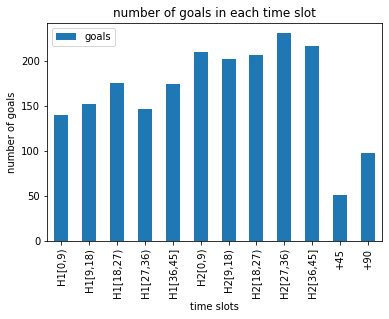

In [176]:
goalTime.plot.bar(title = 'number of goals in each time slot')
plt.xlabel('time slots')
plt.ylabel('number of goals')
plt.show()

# Second part

Now we want to Find the top 10 teams that scored the most in the interval [81-90). the data set related to that time slot is goal25, so we start our analysis on this dataset.
we can count the number of rows that each teamId has on the goal25 dataset

In [91]:
m = (goal25["teamId"].value_counts()).head(10)
m



1609     16
1644     16
1625     15
1633     15
1628     13
1610     13
1623     12
10531    12
1659     11
1639     11
Name: teamId, dtype: int64

To make our results more organized, I put it in a dataframe and also add a name column to the dataframe

In [94]:
top10 = pd.DataFrame({'wyId' : m.index ,'goals' : m.values})
top10

,wyId,goals
0,1609,16
1,1644,16
2,1625,15
3,1633,15
4,1628,13
5,1610,13
6,1623,12
7,10531,12
8,1659,11
9,1639,11


if we want to check the name of these teams we should use teams database, so I load it 

In [32]:
with open(r"C:\Users\Nino\Desktop\teams.json") as myfile :
    data = myfile.read()
teams = pd.DataFrame(json.loads(data))
teams.head(3)

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
1,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
2,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691


I use merge function to extract the rows of teams dataframe that has same wyId as top10 datafeame and the put the name column value of those rows in name column of top10 dataframe

In [95]:
top10["name"] = top10.merge(teams, on = "wyId")["name"]
top10

,wyId,goals,name
0,1609,16,Arsenal
1,1644,16,Watford
2,1625,15,Manchester City
3,1633,15,West Ham United
4,1628,13,Crystal Palace
5,1610,13,Chelsea
6,1623,12,Everton
7,10531,12,Swansea City
8,1659,11,AFC Bournemouth
9,1639,11,Stoke City


# Third part

In this part we want to know if there are players that were able to score at least one goal in 8 different intervals. My strategy in this part is to create a data frame which contains playerIds and 12 columns with boolean values, and the value is true if the player scored in that time slot 

In [131]:
goals = events[events['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goals

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
46,10,Shot,94.595788,177959212,2499719,1H,25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",1609
47,9,Save attempt,96.970614,177959226,2499719,1H,8480,"[{'y': 100, 'x': 100}, {'y': 59, 'x': 12}]",90,Reflexes,"[{'id': 101}, {'id': 1205}, {'id': 1802}]",1631
91,10,Shot,254.745027,177959280,2499719,1H,14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",100,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",1631
92,9,Save attempt,256.547834,177959249,2499719,1H,7882,"[{'y': 0, 'x': 0}, {'y': 48, 'x': 4}]",90,Reflexes,"[{'id': 101}, {'id': 1207}, {'id': 1802}]",1609
554,10,Shot,1710.855093,177959759,2499719,1H,12829,"[{'y': 54, 'x': 94}, {'y': 100, 'x': 100}]",100,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",1631
555,9,Save attempt,1712.908250,177959773,2499719,1H,7882,"[{'y': 0, 'x': 0}, {'y': 46, 'x': 6}]",90,Reflexes,"[{'id': 101}, {'id': 1203}, {'id': 1802}]",1609
898,10,Shot,2815.900791,177960130,2499719,1H,7945,"[{'y': 50, 'x': 92}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",1609
899,9,Save attempt,2817.604704,177960121,2499719,1H,8480,"[{'y': 100, 'x': 100}, {'y': 50, 'x': 8}]",90,Reflexes,"[{'id': 101}, {'id': 1203}, {'id': 1802}]",1631
1107,10,Shot,634.312236,177960379,2499719,2H,12829,"[{'y': 54, 'x': 92}, {'y': 100, 'x': 100}]",100,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",1631
1108,9,Save attempt,636.247679,177960316,2499719,2H,7882,"[{'y': 0, 'x': 0}, {'y': 46, 'x': 8}]",90,Reflexes,"[{'id': 101}, {'id': 1205}, {'id': 1802}]",1609


First, I create a dataframe with playerIds from goasl dataframe

In [152]:
a = pd.DataFrame(goals.playerId.unique(),columns = ["playerId"])
a

,playerId
0,25413
1,8480
2,14763
3,7882
4,12829
5,7945
6,7870
7,26010
8,8325
9,61390


and then I add 12 column with bolean values

In [158]:
a["goal1"] = a.playerId.isin(goal11.playerId)
a["goal2"] = a.playerId.isin(goal12.playerId)
a["goal3"] = a.playerId.isin(goal13.playerId)
a["goal4"] = a.playerId.isin(goal14.playerId)
a["goal5"] = a.playerId.isin(goal15.playerId)
a["goal6"] = a.playerId.isin(goal21.playerId)
a["goal7"] = a.playerId.isin(goal22.playerId)
a["goal8"] = a.playerId.isin(goal23.playerId)
a["goal9"] = a.playerId.isin(goal24.playerId)
a["goal10"]= a.playerId.isin(goal25.playerId)
a["goal11"]= a.playerId.isin(goalE1.playerId)
a["goal12"]=a.playerId.isin(goalE2.playerId)

In [159]:
a

,playerId,goal1,goal2,goal3,goal4,goal5,goal6,goal7,goal8,goal9,goal10,goal11,goal12
0,25413,True,True,True,False,False,True,False,True,True,True,True,False
1,8480,True,True,True,True,True,True,True,True,True,True,True,True
2,14763,True,False,False,True,False,True,False,True,False,False,True,False
3,7882,True,True,True,True,True,True,True,True,True,True,False,True
4,12829,True,True,True,True,True,True,True,True,True,True,False,True
5,7945,True,False,False,False,True,True,False,False,False,True,True,False
6,7870,True,False,True,False,False,False,True,False,True,True,False,False
7,26010,False,False,False,True,False,False,False,True,True,True,False,False
8,8325,False,False,True,True,False,True,True,True,True,True,False,False
9,61390,True,True,True,True,True,True,True,True,True,True,True,True


In [183]:
x = a.sum(axis = 1)
x.head(5)

0    25421.0
1     8492.0
2    14768.0
3     7893.0
4    12840.0
dtype: float64

If I use sum(axis = 1) function, it is gonna calculate the sum value in each row. If we subtract the player Id from it we are gonna reach the total number of Trues or total number of time slots that a player scored in. so we do that and filter our dataframe to player Ids that have scored in 8 time slots or more

In [185]:
b = a[a.sum(1)-a.playerId>=8]
b

,playerId,goal1,goal2,goal3,goal4,goal5,goal6,goal7,goal8,goal9,goal10,goal11,goal12
0,25413,True,True,True,False,False,True,False,True,True,True,True,False
1,8480,True,True,True,True,True,True,True,True,True,True,True,True
3,7882,True,True,True,True,True,True,True,True,True,True,False,True
4,12829,True,True,True,True,True,True,True,True,True,True,False,True
9,61390,True,True,True,True,True,True,True,True,True,True,True,True
11,3429,True,True,True,False,True,True,True,True,True,True,True,True
13,3324,True,True,False,True,True,True,True,True,True,True,False,False
16,8425,True,True,True,True,True,True,True,True,True,True,False,True
19,8094,True,True,True,True,True,True,True,True,True,True,True,False
20,7905,True,False,True,True,True,True,True,True,True,True,False,False


In [186]:
len(b.index)

37

so there are 37 players that scored in at least 8 time slots